In [1]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.set(color_codes=True)

# Problem 1
## Problem Statement:
### A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
#Importing the dataset
df1 = pd.read_csv('Wholesale+Customers+Data.csv')
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
# Check the dataset info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
# Check the desriptive summary
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


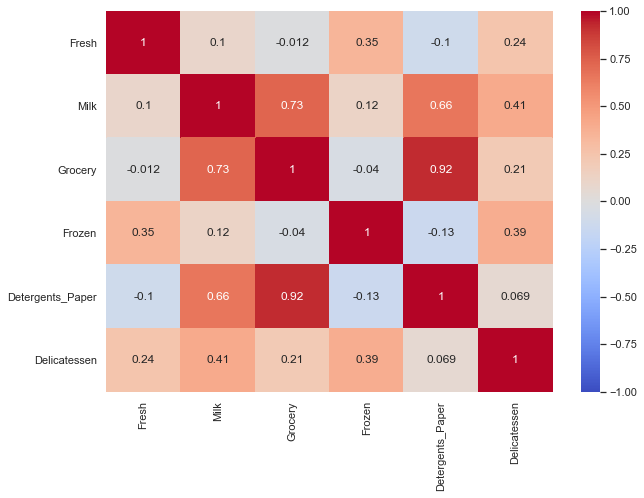

In [5]:
# Check the correlation between variables
plt.figure(figsize =(10,7))
corr = df1.iloc[:,1:].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax =1);

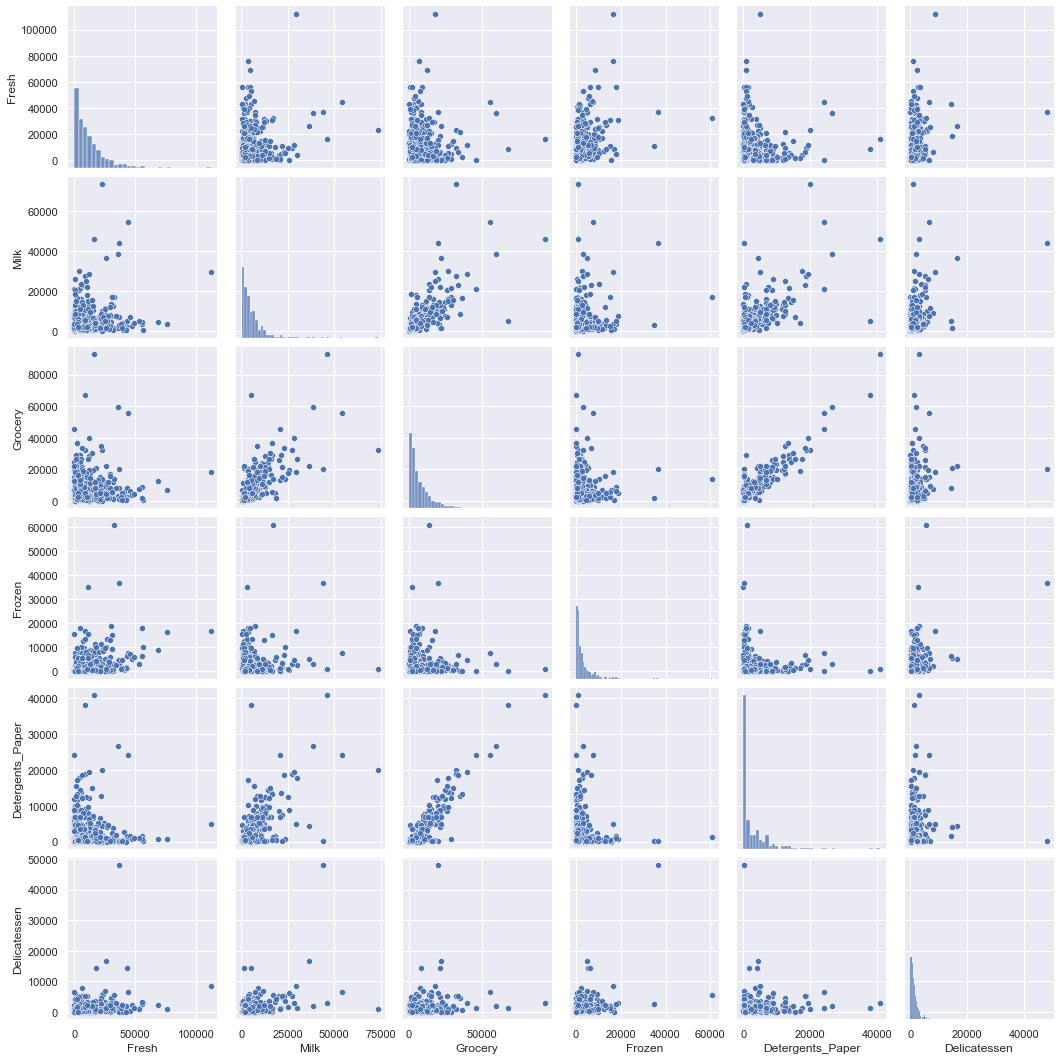

In [6]:
# Plot the pairplot, ID column can be avoided as its just a nominal identifier
sns.pairplot(data=df1.iloc[:,1:]);

####  Inference: 
#### As the problem has mentioned, the dataset indeed contains 440 observations and we have all columns with data, i.e we have no nulls. The table contains 9 columns and has 2 columns of type object and 7 columns of type integer.The index ranges from 0 to 439 and the memory used by the table is 31.1_ KB.

## 1.1 Question
### 1.1.1. Use methods of descriptive statistics to summarize data. 

In [7]:
#Check the descriptive statistics of the data
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


ShapiroResult(statistic=0.781436026096344, pvalue=7.918285999464533e-24)

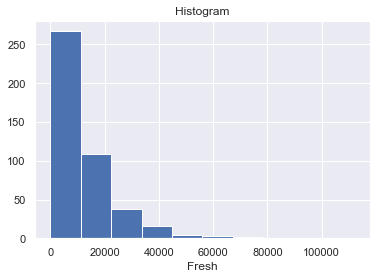

In [8]:
#Histogram of 'Fresh'
df1['Fresh'].hist()
plt.xlabel("Fresh");
plt.title("Histogram");
stats.shapiro(df1['Fresh'])

ShapiroResult(statistic=0.6283338665962219, pvalue=9.762061919511109e-30)

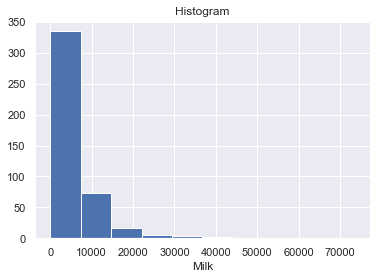

In [9]:
df1['Milk'].hist()
plt.xlabel("Milk");
plt.title("Histogram");
stats.shapiro(df1['Milk'])

ShapiroResult(statistic=0.6762305498123169, pvalue=3.9062091503225934e-28)

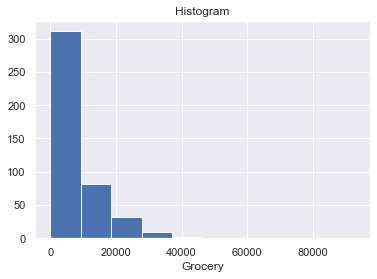

In [10]:
df1['Grocery'].hist()
plt.xlabel("Grocery");
plt.title("Histogram");
stats.shapiro(df1['Grocery'])

ShapiroResult(statistic=0.528296947479248, pvalue=1.2913321191929252e-32)

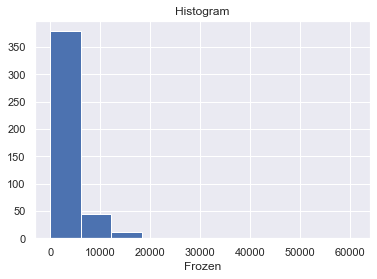

In [11]:
df1['Frozen'].hist()
plt.xlabel("Frozen");
plt.title("Histogram");
stats.shapiro(df1['Frozen'])

ShapiroResult(statistic=0.6054821610450745, pvalue=1.9145929126306173e-30)

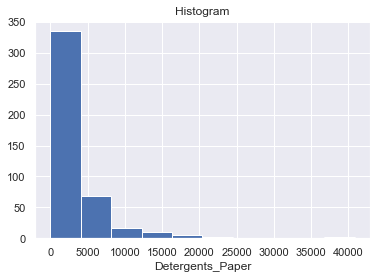

In [12]:
df1['Detergents_Paper'].hist()
plt.xlabel("Detergents_Paper");
plt.title("Histogram");
stats.shapiro(df1['Detergents_Paper'])

ShapiroResult(statistic=0.3610679507255554, pvalue=1.7534077741301854e-36)

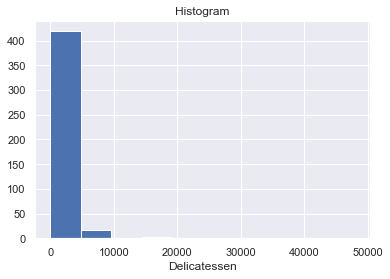

In [13]:
df1['Delicatessen'].hist()
plt.xlabel("Delicatessen");
plt.title("Histogram");
stats.shapiro(df1['Delicatessen'])

### 1.1.2 Which Region and which Channel spent the most?
### 1.1.3 Which Region and which Channel spent the least?

In [14]:
# Add a new column Total which is sum of spends across the product varieties
df1['Total']= df1['Fresh'] + df1['Milk'] + df1['Grocery'] + df1['Frozen'] + df1['Detergents_Paper'] + df1['Delicatessen']
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Total,440.0,NaN,NaN,NaN,33226.136364,26356.30173,904.0,17448.75,27492.0,41307.5,199891.0


In [15]:
#Get the spends across 6 product varieties(Total) against the Regions
df1.groupby(by='Region')['Total'].sum()

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64

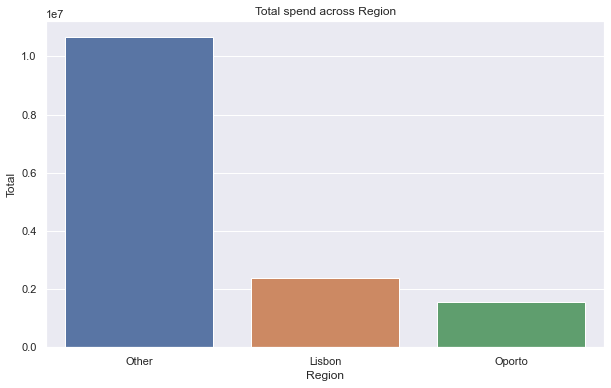

In [16]:
#Bar plot to visulaize the spends across 6 product varieties(Total) against the Regions
plt.figure(figsize=(10,6))
sns.barplot(data = df1,y='Total',x='Region',ci=None,estimator=sum);
plt.title("Total spend across Region");

In [17]:
#Get the spends across 6 product varieties(Total) against the Channels
df1.groupby(by='Channel')['Total'].sum()

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64

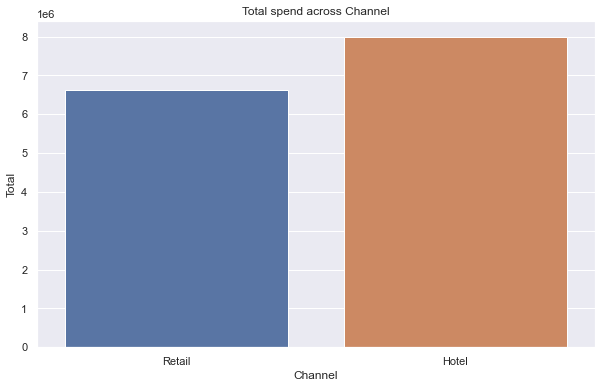

In [18]:
#Bar plot to visulaize the spends across 6 product varieties(Total) against the Channels
plt.figure(figsize=(10,6))
sns.barplot(data = df1,y='Total',x='Channel',ci=None,estimator=sum);
plt.title("Total spend across Channel");

## 1.2 Question
### Q. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

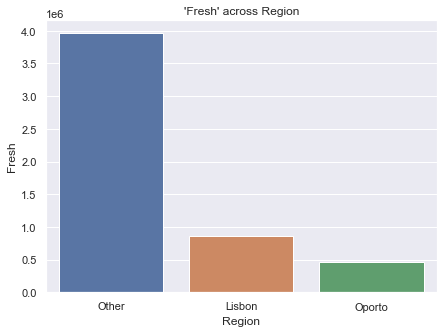

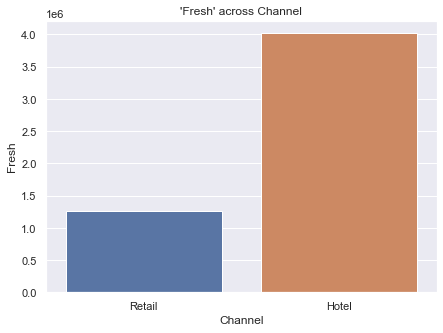

In [19]:
#Check the spending on 'Fresh' across regions and channels
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Fresh',x='Region',ci=None,estimator=sum);
plt.title('\'Fresh\' across Region');
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Fresh',x='Channel',ci=None,estimator=sum);
plt.title('\'Fresh\' across Channel');


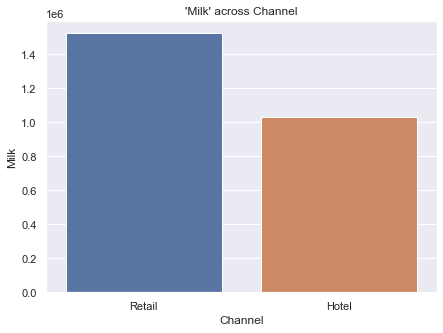

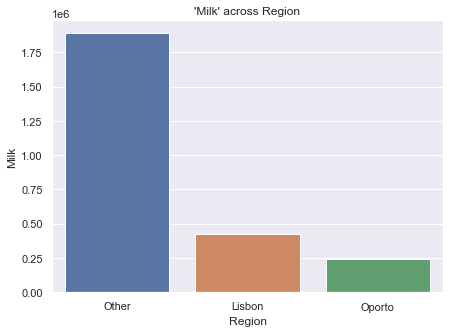

In [20]:
#Check the spending on 'Milk' across regions and channels
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Milk',x='Channel',ci=None,estimator=sum);
plt.title('\'Milk\' across Channel');
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Milk',x='Region',ci=None,estimator=sum);
plt.title('\'Milk\' across Region');

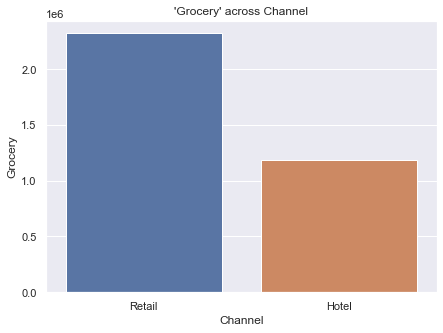

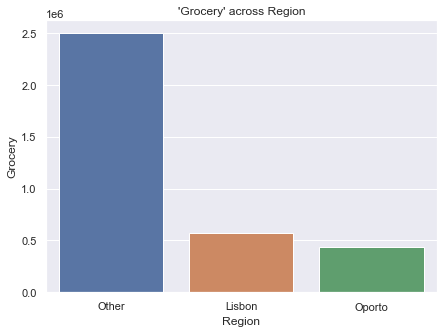

In [21]:
#Check the spending on 'grocery' across regions and channels
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Grocery',x='Channel',ci=None,estimator=sum);
plt.title('\'Grocery\' across Channel');
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Grocery',x='Region',ci=None,estimator=sum);
plt.title('\'Grocery\' across Region');

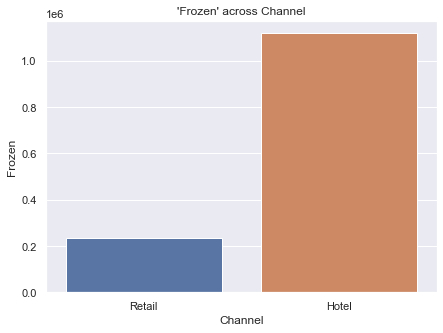

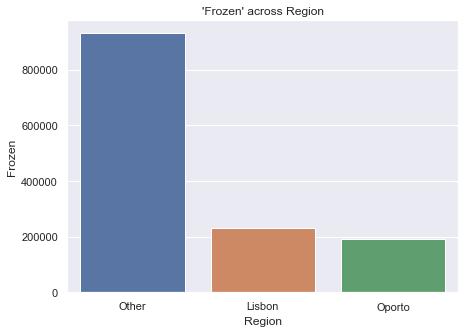

In [22]:
#Check the spending on 'Frozen' across regions and channels
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Frozen',x='Channel',ci=None,estimator=sum);
plt.title('\'Frozen\' across Channel');
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Frozen',x='Region',ci=None,estimator=sum);
plt.title('\'Frozen\' across Region');

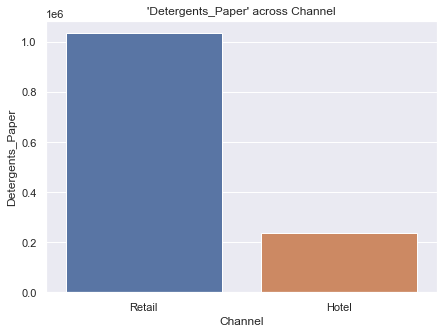

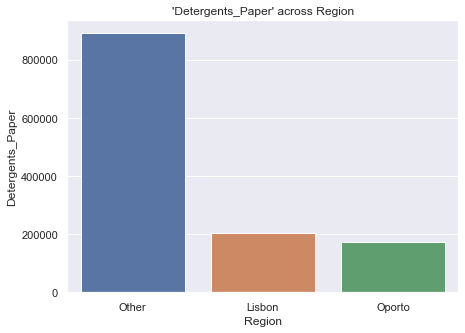

In [23]:
#Check the spending on 'Detergents_Paper' across regions and channels
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Detergents_Paper',x='Channel',ci=None,estimator=sum);
plt.title('\'Detergents_Paper\' across Channel');
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Detergents_Paper',x='Region',ci=None,estimator=sum);
plt.title('\'Detergents_Paper\' across Region');

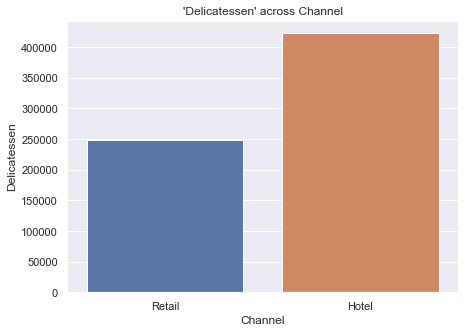

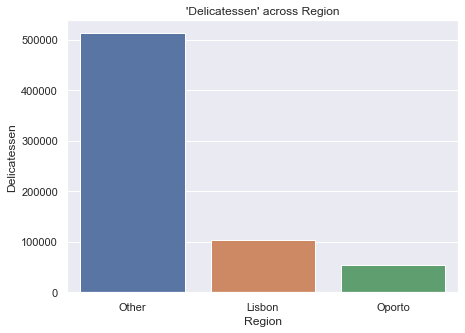

In [24]:
#Check the spending on 'Delicatessen' across regions and channels
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Delicatessen',x='Channel',ci=None,estimator=sum);
plt.title('\'Delicatessen\' across Channel');
plt.figure(figsize=(7,5))
sns.barplot(data = df1,y='Delicatessen',x='Region',ci=None,estimator=sum);
plt.title('\'Delicatessen\' across Region');

         Delicatessen  Detergents_Paper    Fresh   Frozen  Grocery     Milk
Channel                                                                    
Hotel          421955            235587  4015717  1116979  1180717  1028614
Retail         248988           1032270  1264414   234671  2317845  1521743


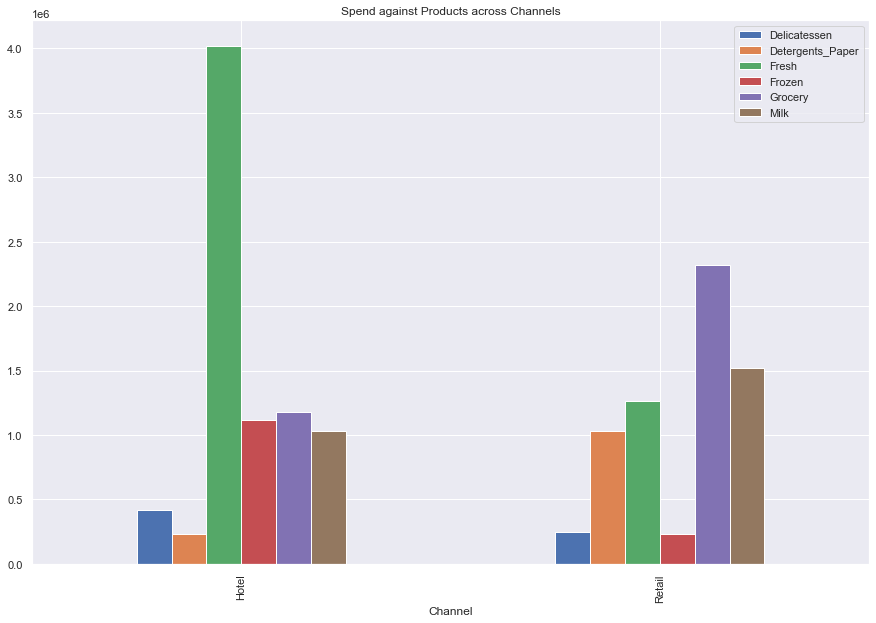

In [25]:
# Create a barplot for Channel vs Spend against all products. , we can remove the Buyer/Spender as its a nominal value 
# and we can remove the Total column, created earlier.
df1.drop(['Buyer/Spender','Total'],axis = 1,inplace=True)
df1_1 = pd.pivot_table(df1,index ='Channel',aggfunc='sum')
print (df1_1)
df1_1.reset_index()
df1_1.plot(kind='bar',figsize=(15,10),title='Spend against Products across Channels');

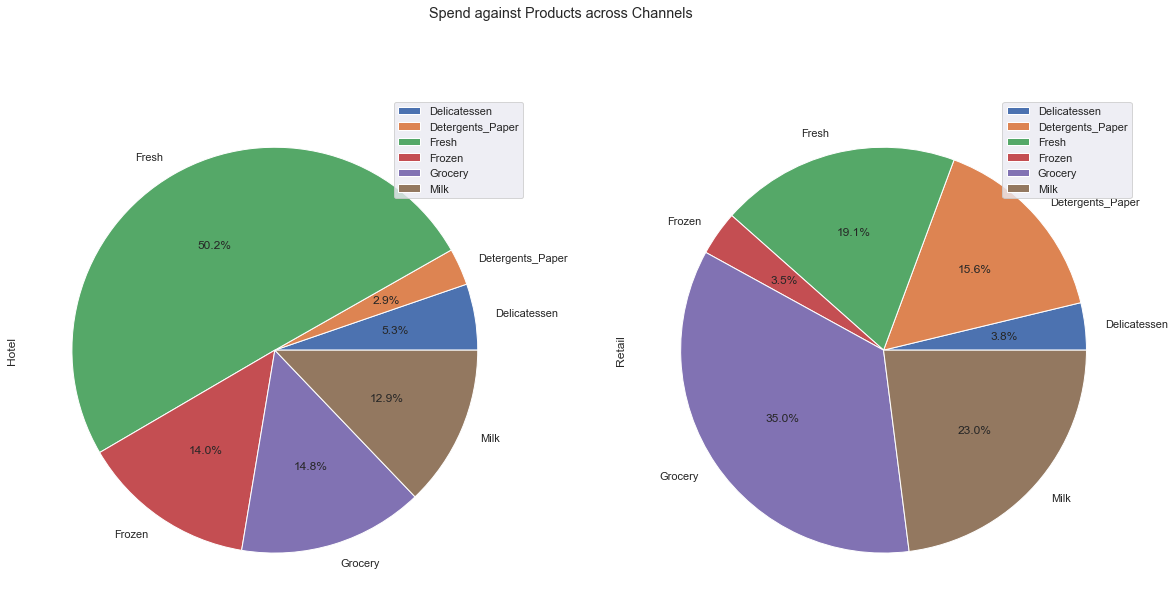

In [26]:
# Create a piechart for Channel-wise spending against all product varieties
df1_1.T.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(20,10),title='Spend against Products across Channels');

        Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery     Milk
Region                                                                   
Lisbon        104327            204136   854833  231026   570037   422454
Oporto         54506            173311   464721  190132   433274   239144
Other         512110            890410  3960577  930492  2495251  1888759


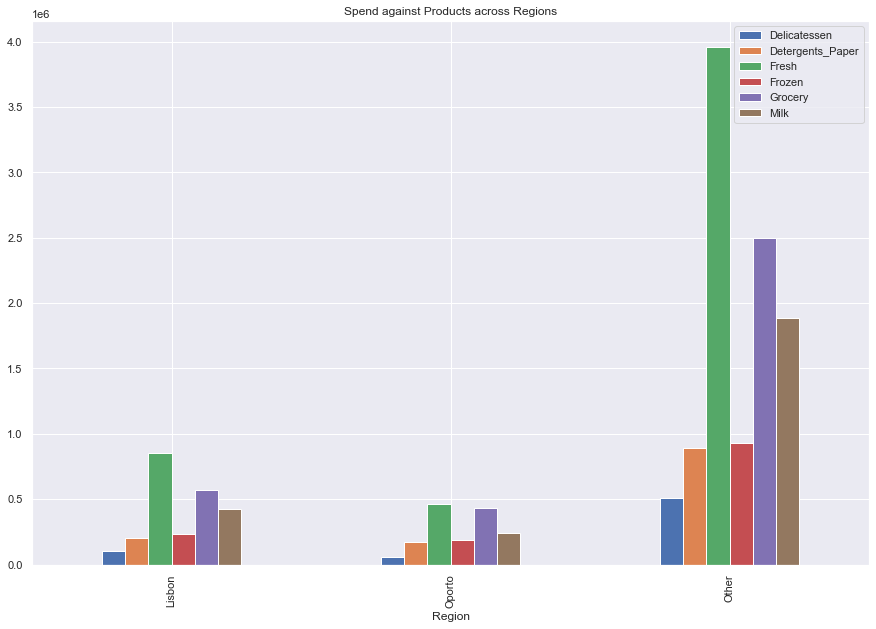

In [27]:
# Create a barplot for Region vs Spend against all products
df1_2 = pd.pivot_table(df1,index ='Region',aggfunc='sum')
print (df1_2)
df1_2.reset_index()
df1_2.plot(kind='bar',figsize=(15,10),title='Spend against Products across Regions');

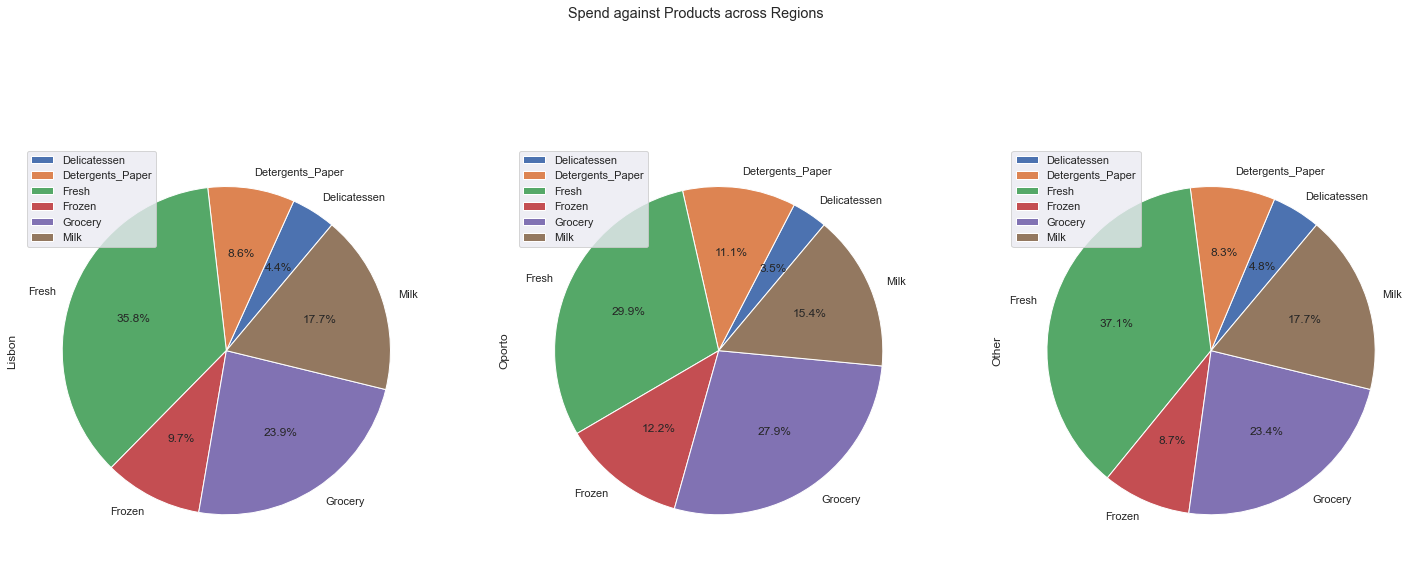

In [28]:
# Create a piechart for Region-wise spending against all product varieties
df1_2.T.plot(kind='pie',subplots=True,autopct='%1.1f%%',figsize=(25,10),startangle=50,title='Spend against Products across Regions');


## 1.3 Question
### Q. On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [29]:
# Store the decsrive attributes of variables in a dataframe
df1_desc = df1.describe().T
df1_desc

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [30]:
# Create a new column, CV, Coefficient of Variation, which is tsd.deviation/mean exreseed as a %
df1_desc['CV'] = round(df1_desc['std']/df1_desc['mean'] *100,2)
df1_desc

,count,mean,std,min,25%,50%,75%,max,CV
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,105.39
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,127.33
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,119.52
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,158.03
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,165.46
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,184.94


In [31]:
# Sort the values by CV 
df1_desc.sort_values(by='CV',ascending=True)['CV']

Fresh               105.39
Grocery             119.52
Milk                127.33
Frozen              158.03
Detergents_Paper    165.46
Delicatessen        184.94
Name: CV, dtype: float64

## 1.4 Question
### Q. Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

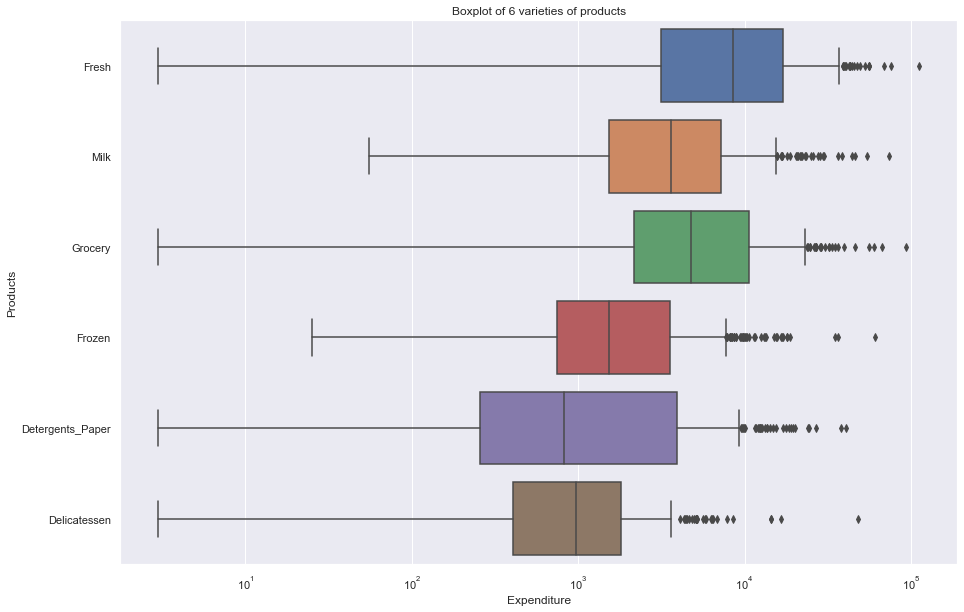

In [32]:
#Create a boxplot for dataframe
plt.figure(figsize=(15,10))
sns.boxplot(data=df1,orient = 'h');
plt.xscale('log');
plt.title('Boxplot of 6 varieties of products');
plt.xlabel('Expenditure');
plt.ylabel('Products');

# Problem 2
## Problem Statement:
### The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [33]:
#import the dataset
df2 = pd.read_csv('Survey-1.csv')
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [35]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


In [36]:
# Check all the unique values in category variables
df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
df2['Class'].unique()

array(['Junior', 'Senior', 'Sophomore'], dtype=object)

In [38]:
df2['Major'].unique()

array(['Other', 'Management', 'CIS', 'Economics/Finance', 'Undecided',
       'International Business', 'Retailing/Marketing', 'Accounting'],
      dtype=object)

In [39]:
df2['Grad Intention'].unique()

array(['Yes', 'Undecided', 'No'], dtype=object)

In [40]:
df2['Employment'].unique()

array(['Full-Time', 'Part-Time', 'Unemployed'], dtype=object)

In [41]:
df2['Computer'].unique()

array(['Laptop', 'Tablet', 'Desktop'], dtype=object)

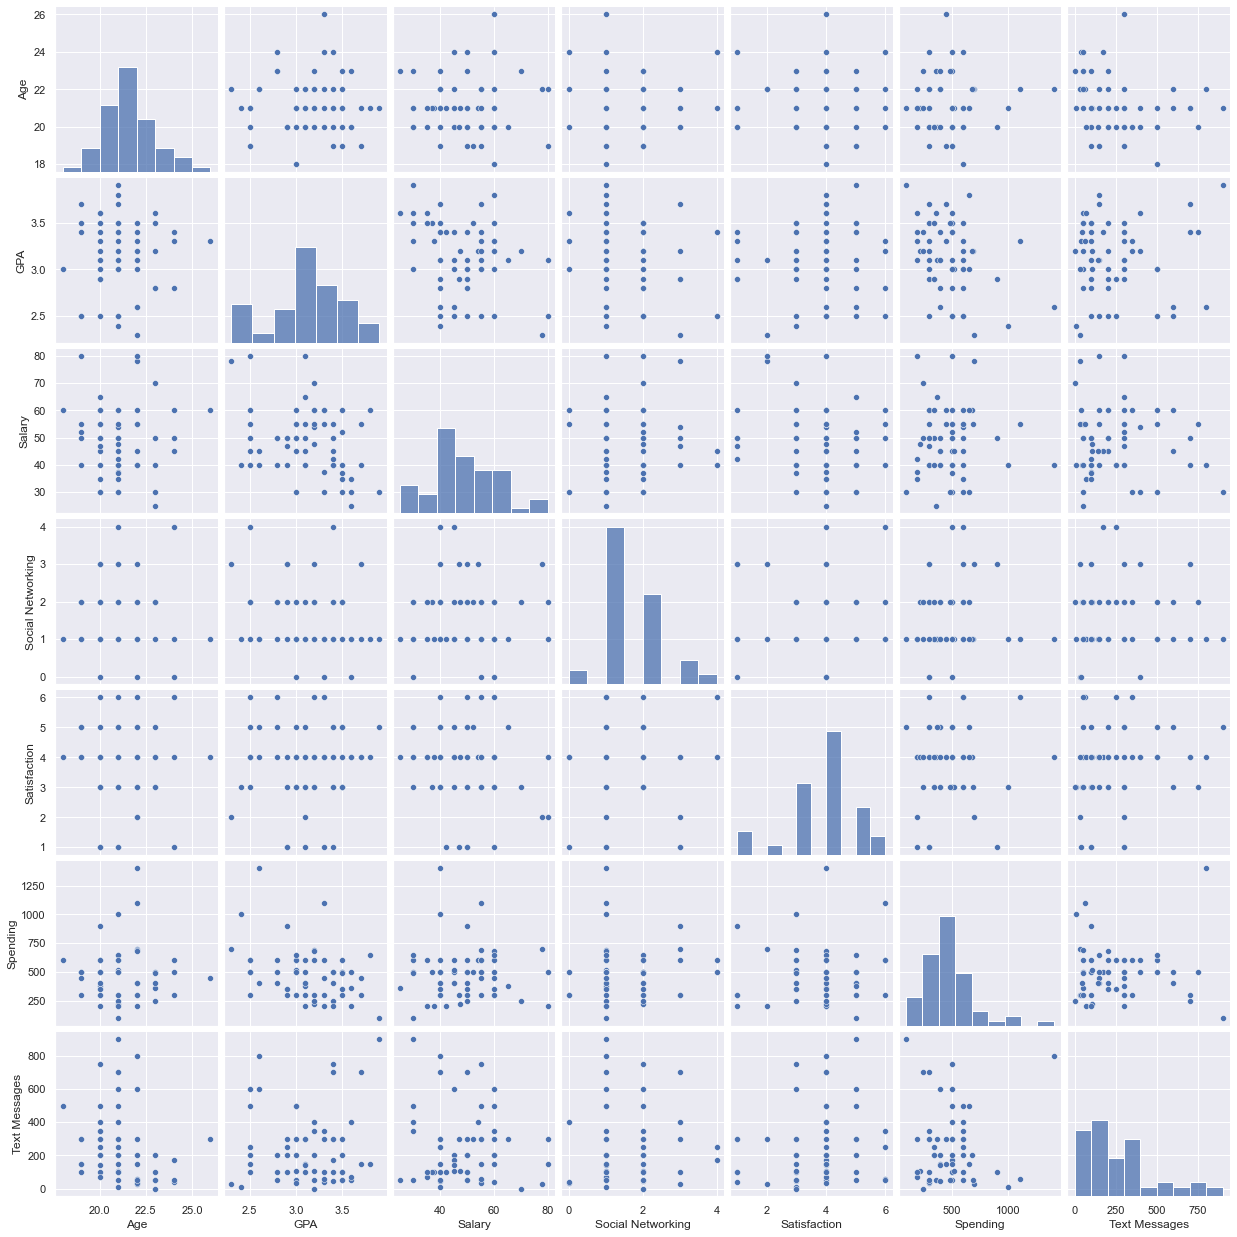

In [42]:
sns.pairplot(data=df2.iloc[:,1:]);

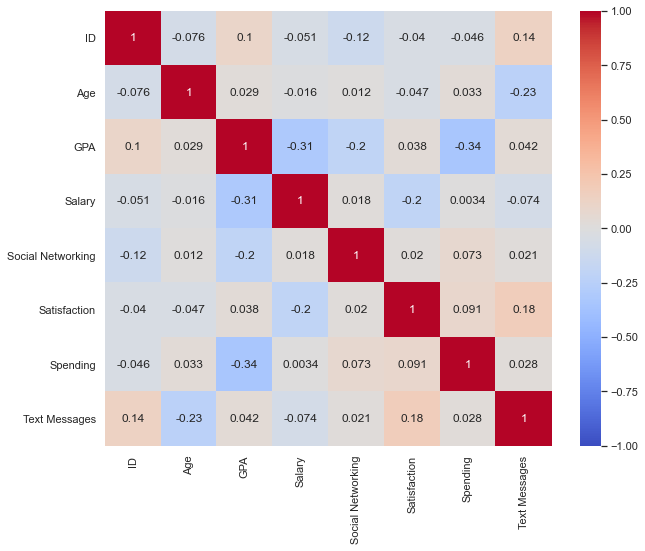

In [43]:
#create heatmap to check correlation
corr=df2.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',vmin=-1,vmax =1);

## 2.1 Question
### Q. For this data, construct the following contingency tables (Keep Gender as row variable)
### 2.1.1 Gender and Major

In [44]:
pd.crosstab(df2['Gender'],df2['Major'],margins='True',margins_name='Total')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


### 2.1.2 Gender and Grad Intention

In [45]:
pd.crosstab(df2['Gender'],df2['Grad Intention'],margins='True',margins_name='Total')

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


### 2.1.3 Gender and Employment

In [46]:
pd.crosstab(df2['Gender'],df2['Employment'],margins='True',margins_name='Total')

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


### 2.1.4 Gender and Computer

In [47]:
pd.crosstab(df2['Gender'],df2['Computer'],margins='True',margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


## 2.2 Question
### Q. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
### 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [48]:
df2[df2["Gender"] == 'Male']['Gender'].count()/df2['Gender'].count()

0.46774193548387094

### 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [49]:
df2[df2["Gender"] == 'Female']['Gender'].count()/df2['Gender'].count()

0.532258064516129

## 2.3 Question
### Q. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [50]:
df2_1 = df2[df2['Gender'] == 'Male']
pd.crosstab(df2_1['Gender'],df2_1['Major'],normalize ='index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU

In [51]:
df2_2 = df2[df2['Gender'] == 'Female']
pd.crosstab(df2_2['Gender'],df2_2['Major'],normalize ='index')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing
Gender,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727


In [52]:
df2_major = pd.crosstab(df2['Gender'],df2['Major'])
df2_major.iloc[0,:]/(df2[df2["Gender"] == 'Female']['Gender'].count())

Major
Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
Undecided                 0.000000
Name: Female, dtype: float64

## 2.4 Question
### Q. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.
### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [53]:
pd.crosstab(df2['Gender'],df2['Grad Intention'],margins='True',margins_name='Total')

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [54]:
prob_male_yes_grad = 17/62
prob_male_yes_grad

0.27419354838709675

In [55]:
pd.crosstab(df2['Gender'],df2['Computer'],margins='True',margins_name='Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [56]:
female_without_laptop = 2 + 2
prob_female_no_laptop = female_without_laptop/62
prob_female_no_laptop

0.06451612903225806

## 2.5 Question
### Q. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [57]:
prob_male = df2[df2["Gender"] == 'Male']['Gender'].count()/df2['Gender'].count()
pd.crosstab(df2['Gender'],df2['Employment'],margins='True',margins_name='Total')

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [58]:
prob_full_emp = 10/62
prob_male_and_full_emp = 7/62
prob_male_or_full_emp = prob_male + prob_full_emp - prob_male_and_full_emp
prob_male_or_full_emp

0.5161290322580645

### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [59]:
pd.crosstab(df2['Gender'],df2['Major'],margins='True',margins_name='Total')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [60]:
prob_international_business_female = 4/33
prob_management_female = 4/33
prob_ib_mangement_female = prob_international_business_female + prob_management_female
prob_ib_mangement_female

0.24242424242424243

## 2.6 Question
### Q. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [61]:
pd.crosstab(df2['Gender'],df2[df2['Grad Intention'] != 'Undecided']['Grad Intention'],margins='True',margins_name='Total')

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [62]:
#for independent events p(A&B) = p(A) * p(B)
prob_female = 20/40
prob_yes_grad = 28/40
value = prob_female * prob_yes_grad
prob_female_yes_grad = 11/40
print(value,prob_female_yes_grad)
#Since values are not same they are no independent events.

0.35 0.275


## 2.7 Question
### Q. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data
### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [63]:
print ('No. of students with GPA < 3 is :{}'.format(df2[df2['GPA'] < 3]['GPA'].count()))
df2[df2['GPA'] < 3]['GPA'].count()/df2['GPA'].count()

No. of students with GPA < 3 is :17


0.27419354838709675

### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [64]:
print ('No. of male students with salary more than 50 is :{}'.format(df2[(df2['Gender'] == 'Male') & (df2['Salary'] >= 50)]['Gender'].count()))
df2[(df2['Gender'] == 'Male') & (df2['Salary'] >= 50)]['Gender'].count()/df2[df2['Gender'] == 'Male']['Gender'].count()

No. of male students with salary more than 50 is :14


0.4827586206896552

In [65]:
print ('No. of female students with salary more than 50 is :{}'.format(df2[(df2['Gender'] == 'Female') & (df2['Salary'] >= 50)]['Gender'].count()))
df2[(df2['Gender'] == 'Female') & (df2['Salary'] >= 50)]['Gender'].count()/df2[df2['Gender'] == 'Female']['Gender'].count()

No. of female students with salary more than 50 is :18


0.5454545454545454

# 2.8 Question
### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

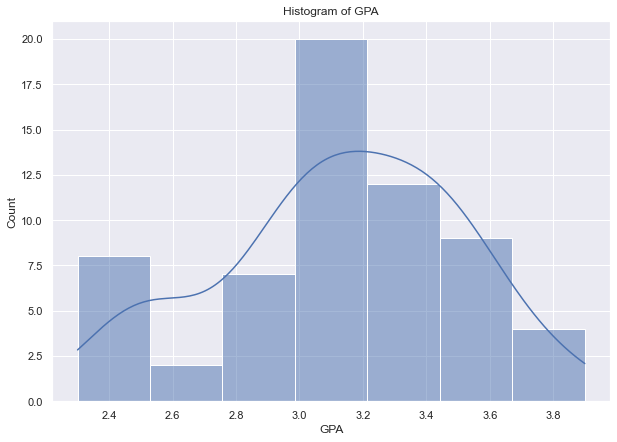

In [66]:
plt.figure(figsize=(10,7))
sns.histplot(x=df2['GPA'],kde=True);
plt.title('Histogram of GPA');

In [67]:
# Histogram just provides a visual indication, Shapiro Wilk test will give us a statstical inference 
# on whether the distribution is normal.
stats.shapiro(df2['GPA'])

ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084)

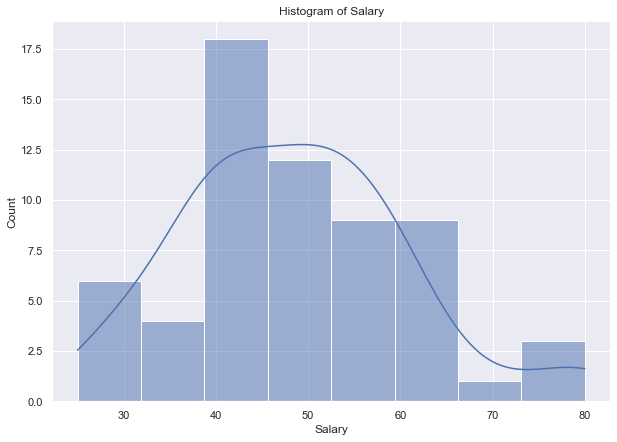

In [68]:
plt.figure(figsize=(10,7))
sns.histplot(x=df2['Salary'],kde=True);
plt.title('Histogram of Salary');

In [69]:
stats.shapiro(df2['Salary'])

ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905)

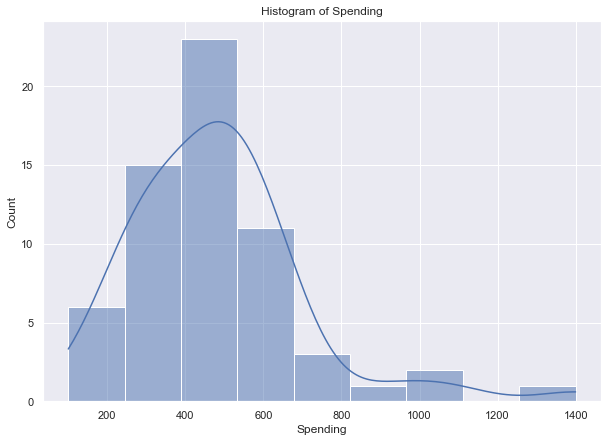

In [70]:
plt.figure(figsize=(10,7))
sns.histplot(x=df2['Spending'],kde=True);   
plt.title('Histogram of Spending');

In [71]:
stats.shapiro(df2['Spending'])

ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05)

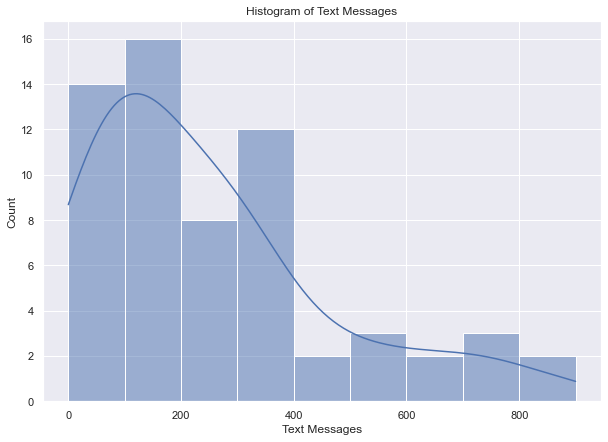

In [72]:
plt.figure(figsize=(10,7))
sns.histplot(x=df2['Text Messages'],kde=True);  
plt.title('Histogram of Text Messages');

In [73]:
stats.shapiro(df2['Text Messages'])

ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06)

### 2.8.2 Write a note summarizing your conclusions

# 3 Question
### An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

### The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [74]:
df3 = pd.read_csv('A+&+B+shingles.csv')
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [75]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [76]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [77]:
#Validation of mean moisture content of 'A' type shingle.

#Step 1 - State the hypothesis
# Null Hypothesis - Ho - mean moisture content of 'A' shingle = 0.35
# Alt Hypothesis  - Ha - mean moisture content of 'A' shingle > 0.35

#Step 2 - Alpha value. Since not specified wll be assumed as 0.05
# alpha = 0.05

#Step3 - Determine tstat and pvalue

tstat,pvalue = stats.ttest_1samp(df3['A'],0.35)
print (tstat,pvalue/2)

-1.4735046253382782 0.07477633144907513


In [78]:
#Validation of mean moisture content of 'B' type shingle.

#Step 1 - State the hypothesis
# Null Hypothesis - Ho - mean moisture content of 'B' shingle <= 0.35
# Alt Hypothesis  - Ha - mean moisture content of 'B' shingle > 0.35

#Step 2 - Alpha value. Since not specified wll be assumed as 0.05
# alpha = 0.05

#Step3 - Determine tstat and pvalue

tstat,pvalue = stats.ttest_1samp(df3['B'],0.35,nan_policy = 'omit')
print (tstat,pvalue/2)

-3.1003313069986995 0.0020904774003191826


### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [79]:
#Validation of mean moisture content of "A" &'B' type shingles to be same..

#Step 1 - State the hypothesis
# Null Hypothesis - Ho - mean moisture content of 'A' shingle = mean moisture content of 'B' shingle
# Alt Hypothesis  - Ha - mean moisture content of 'A' shingle <> mean moisture content of 'B' shingle

#Step 2 - Alpha value. Since not specified wll be assumed as 0.05
# alpha = 0.05

#Step3 - Determine tstat and pvalue

tstat,pvalue = stats.ttest_ind(df3['A'],df3['B'],nan_policy = 'omit')
print (tstat,pvalue)

1.2896282719661123 0.2017496571835306
